In [ ]:
- title: Занятие 10
- author: Kononov Dmitry
- date: 2022-12-13
- category: python
- test_link: http://olymp3.vdi.mipt.ru/cgi-bin/new-client?contest_id=10107
- test_comment: Задание №7
- slug: lab10
- ipynb_url: download/lab10.ipynb

# Практическое занятие 10: Использование очереди и стека
## Цель: Получить практический навык реализации и использования структуры данных стек и очередь на языке **Python**
## Задачи:
1. Стек и очередь
2. Корректность скобочного выражения (с несколькими видами скобок)
3. Вычисление постфиксного выражения (обратная польская нотация)
4. Алгоритм сортировочной станции Эдсгера Дейкстры

## 1. Стек и очередь
### 1.1 Стек
**Стеком** (англ. – *stack*) называется структура данных, в которой элементы хранятся в виде последовательности, при этом работать можно только с одним элементом — который был последним добавлен в стек. Поэтому стек также называют структурой типа **LIFO** (*last in, first out — последним пришел, первым ушел*). 
Стек должен поддерживать следующие операции:
- push — добавить (положить) в конец стека новый элемент;
- pop — извлечь из стека последний элемент;
- top — узнать значение последнего элемента (не удаляя его);
- size — узнать количество элементов в стеке.

При этом операция `top()` может отсутствовать (ее можно заменить на пару операций `pop()` и `push()`), а вместо операции `size()` может быть более простая операция `isempty()` проверки стека на пустоту. Возможна и операция `clear()`, которая очищает стек.

Например, реализация стека на языке **Python** может выглядеть следующим образом:
```python
def push(stack, x):
    stack.append(x)

def pop(stack):
    return stack.pop()

def clear(stack):
    stack.clear()

def is_empty(stack):
    return len(stack) == 0

def size(stack):
    return len(stack)

def top(stack):
    return stack[len(stack)-1]
```

**Задача 1 —** Используя реализацию стека выше, напишите программу, которая последовательно кладет в стек произвольный массив чисел, а затем распечатывает их , последовательно доставая, пока стек не пуст (например, набор (1,...,10)).

### 1.2 Очередь
**Очередью** (англ. – *queue*) называется структура данных, из которой удаляется первым тот элемент, который был первым в очередь добавлен. Очередь также называют структурой типа **FIFO** (*first in, first out — первым пришел, первым ушел*).

Очередь поддерживает те же операции, что и стек, за исключением того, что операции pop и top работают с другим концом очереди.
- push — добавить в начало очереди новый элемент;
- pop — извлечь из очереди последний элемент;
- top — узнать значение последнего элемента (не удаляя его);
- size — узнать количество элементов в очереди.

## 2. Корректность скобочного выражения (с несколькими видами скобок)
Одним из примеров использования стека является проверка корректности скобочного выражения при нескольких видах скобок.

Рассмотрим какое-либо выражение, в котором могут встречаться скобки трех видов — круглые `(` и `)`, квадратные `[` и `]` и фигурные `{` и `}`. Уберем все символы, кроме скобок. Полученную последовательность называют **правильной скобочной последовательностью**.

Например, последовательность `([])` будет правильной, а последовательность `([)]` — нет (нарушен порядок вложенности скобок).

Более формальное определение правильной скобочной последовательности строится индуктивно. Прежде всего, пустая строка — это правильная скобочная последовательность. Если `A` — правильная скобочная последовательность, то `(A)`, `[A]` и `{A}` также являются правильными скобочными последовательностями. Если `A` и `B` — правильные скобочные последовательности, то их конкатенация `AB` также будет правильной скобочной последовательностью.

Использование стека позволяет построить эффективный алгоритм проверки скобочной последовательности на правильность — встреченная закрывающая скобка должна быть парной к последней встреченной открывающей, после чего их необходимо удалить из последовательности. 

Итак, для хранения открывающих скобок будем использовать стек. Пройдем по строке от начала до конца. Если очередной символ — открывающая скобка, то добавляем ее в стек. Если закрывающая — то проверяем, что стек не пуст и скобка на вершине стека парная к данной закрывающей. При соблюдении условий открывающая скобка удаляется из стека, иначе алгоритм заканчивает свою работу (так как последовательность неправильная). Символы, не являющиеся скобками игнорируются.

После окончания работы алгоритма стек должен остаться пустым. Если стек не пуст — это означает, что некоторые открывающие скобки не были закрыты, то есть последовательность не является правильной.

**Задача 2 —** Напишите программу, определяющую правильность введенного скобочного выражения, в котором используются скобки 3 видов: `()`, `{}`, `[]`.

## 3. Вычисление постфиксного выражения (обратная польская нотация)
Еще один пример использования стека — это вычисление постфиксного выражения (арифметического выражения в обратной польской нотации).

**Постфиксная (или обратная польская)** запись арифметического выражения — это способ записи выражений, в котором знак операции записывается не между операндами, а после операндов. Например, разность чисел 2 и 3 в постфиксной записи записывается так: «2 3 -». 

Арифметическое выражение $$(2 - 3) * (12 - 10) + \frac{4}{2}$$ в обратной польской нотации будет выглядеть как $$2 3 - 12 10 - *  4 2  /+$$

Из примера видно, что в постфиксной записи не нужны скобки и приоритеты операций.

Постфисная запись является последовательностью действий, которую удобно вычислять автоматически, если использовать для этого стек. Числа добавляются в стек, а результат операций применяется к двум последним числам в стеке, которые из стека удаляются. Затем результат кладется в стек.

То есть выражение $$2 3 - 12 10 - * 4 2  /+$$ в постфиксной записи может быть вычислено так:

1. Число 2 кладется в стек.
2. Число 3 кладется в стек.
3. Из стека извлекаются числа 2 и 3, к ним применяется операция вычитания, результат (число -1) кладется в стек.
4. Число 12 кладется в стек.
5. Число 10 кладется в стек.
6. Из стека извлекаются числа 12 и 10, к ним применяется операция вычитания, результат (число 2) кладется в стек.
7. Из стека извлекаются числа -1 и 2, к ним применяется операция умножения, результат (число -2)  кладется в стек.
8. Число 4 кладется в стек.
9. Число 2 кладется в стек.
10. Из стека извлекаются числа 4 и 2, к ним применяется операция деления, результат (число 2) кладется в стек.
11. Из стека извлекаются числа -2 и 2, к ним применяется операция сложения, результат (число 0) кладется в стек.

В итоге в стеке остается одно число — 0, которое и есть результат вычисления.

**Задача 3 —** Напишите программу, которая читает выражение в обратной польской нотации и с использованием стека считает его значение или пишет, что выражение составлено не корректно (если оно некорректно). Числа и знаки операций во входной строке разделены пробелами.

## 4. Алгоритм сортировочной станции Эдсгера Дейкстры
Привычная нам форма записи арифметического выражения, например  $$(2 - 3) * (12 - 10) + \frac{4}{2}$$ называется **инфиксной** записью.

Эта запись привычна и удобна для вычисления человеком, но не удобна для вычисления компьютером — как мы видели ранее для этого более удобна **постфиксная** запись.

Для перевода арифметического выражения из *инфиксной* формы в *постфиксную* используется [алгоритм сортировочной станции Эдсгера Дейкстры] (https://en.wikipedia.org/wiki/Shunting_yard_algorithm). Суть его заключается в следующем.

Есть сортировочная станция с 3 путями: 2 подъездных и 1 тупик. С правого подъездного пути едут выражения: в каждом "вагоне" или операнд или знак операции. Операнды свободно проезжают в левый путь (образуя очередь), а операторы заезжают в тупик. Если приоритет входящего оператора ниже приоритета того, что навершине стека (на входе в тупик), то из стека достаётся оператор с большим приоритетом. То же самое происходит, если приооритет приходящего оператора равен приоритету такового на вершине стека, но тот, что на вершине - ассоциативен.

На рисунках ниже рассмотрен пример (см. ссылку на википедию выше) преобразования выражения $$a + b * c - d$$ в постфиксную форму согласно рассмотренному выше алгоритму:
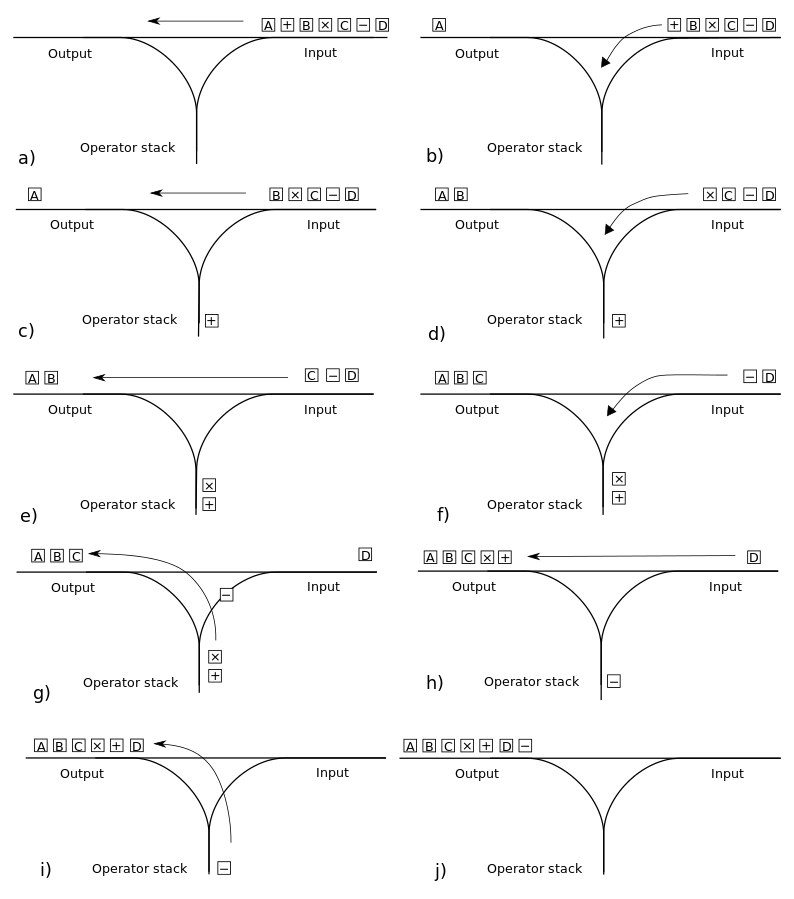
(рисунки By Salix alba - Own work, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=10960619).

В случае, если в выражении встречаются скобки, то поступают следующим образом. Если скобка открывающаяся, то ее просто помещают в стек. Если скобка закрывающаяся, то из стека извлекаются все операторы до открывающейся скобки и помещаются в очередь (на левый путь), затем скобки удаляются.

**Задача 4 —** Реализуйте на алгоритм сортировочной станции для преобразования произвольных арифметических выражений с 4 действиями (`+`,`-`,`*`,`/`) из инфиксной записи в обратную польскую.

**Задача 5 —** Добавьте в предыдущую реализацию поддержку выражений со скобками.